## Install thư viện

In [38]:
!pip install torch_geometric

In [39]:
!pip install --upgrade scipy networkx

# Tiền xử lý dữ liệu

## Import thư viện + data

In [50]:
from torch_geometric.data import Data
import torch
import pandas as pd
from itertools import combinations
import numpy as np

In [51]:
df_user_relation = pd.read_csv("/content/drive/Othercomputers/My Laptop/Shopee/user_relation.csv")
# df_user_relation = df_user_relation.drop("Unnamed: 0", axis = 1)

In [52]:
df_user_relation

,userid,refitem,type,device,account,creditcard,usercode,userset
0,33152428,KXC0oY3MMrTG+bnlFFvBPXZC5PW8iw6kgWztENWdIJg=,device,1,0,0,33152428,"33152428, 8802740"
1,129669524,pdYhqPS3cmuPC3pm8HUVWD41lCxQJtT8Q5OmVmZ2ply=,device,1,0,0,129669524,"129669524, 27536218"
2,15190214,6xoWlzZrjCPxENoR9lXr09m+xNCxISXGiMJ6/GvNvnc=,device,1,0,0,15190214,"15190214, 15180794, 11628224"
3,133775686,Fo8aUEQzRpoZ7dQrprxb5Rl/hX81FoIfoSNk1lv9e7W=,device,1,0,0,133775686,"133775686, 260456"
4,29087736,KPaUrqhU+vW9/m+xp52tl/TFgJBE8e9kGKMxyVQSc2q=,device,1,0,0,29087736,"29087736, 6917000"
...,...,...,...,...,...,...,...,...
162422,17575470,2242100310,account,0,1,0,17575470,"43737260, 50074310, 42830430, 18629050, 249270..."
162423,15785630,2220022228894,account,0,1,0,15785630,"23225270, 15785630"
162424,11367690,391302003241821,account,0,1,0,11367690,"6983172, 11367690"
162425,23446396,884102022094820,account,0,1,0,23446396,"227980878, 23446396"


In [53]:
df_user_relation.groupby(by=['refitem','type']).count()

,,userid,device,account,creditcard,usercode,userset
refitem,type,,,,,,
+++ivFTF+M/DxnA21MRSxuqZO/KUheIu0RXva/O41sq=,device,2,2,2,2,2,2
++53iBcrIz8AlMWkrmV+wM2Dd6sDURson4MMwahyFRW=,device,3,3,3,3,3,3
++GVp0u/WSB131/gJpU9ZLVswJDyz4q2O9iL14FSbp8=,device,2,2,2,2,2,2
++HhyYz77gILTvO2aogRTSpl0N6DdKWe7C5CK0IsL/E=,device,2,2,2,2,2,2
++IPuvUfesRBaGrhqCg/zho8sMyMBITh5vBaXgtudHy=,device,2,2,2,2,2,2
...,...,...,...,...,...,...,...
zzi/SHPqugydoH/NCERZcs1AdvmE4wkj15i2Oc016ku=,device,2,2,2,2,2,2
zzkrgJNWfevR2qHxLlvvHpP6zn79hz22jco9OENsp5y=,device,2,2,2,2,2,2
zzr+Gj7BPyvux9jp1XDLpxUY2qUz9APDuNwYdwKKwsq=,device,3,3,3,3,3,3


In [54]:
df_user_relation[df_user_relation['refitem'] == '+++ivFTF+M/DxnA21MRSxuqZO/KUheIu0RXva/O41sq=']

,userid,refitem,type,device,account,creditcard,usercode,userset
64664,102164030,+++ivFTF+M/DxnA21MRSxuqZO/KUheIu0RXva/O41sq=,device,1,0,0,102164030,"102164030, 66422306"
81661,66422306,+++ivFTF+M/DxnA21MRSxuqZO/KUheIu0RXva/O41sq=,device,1,0,0,66422306,"102164030, 66422306"


In [55]:
df_user_relation = df_user_relation.drop_duplicates(subset=['refitem', 'type'], keep='first')

## Bảng couple_comon_userid

Tìm ra các cặp user_id (Không phải là set nữa) từ bảng đã lọc các user nghi ngờ

In [56]:
userset_copy = df_user_relation.copy()
userset_copy.loc[:, 'userset'] = userset_copy['userset'].apply(lambda x: list(map(int, x.split(', '))))

In [57]:
userset = userset_copy[['userset', 'type']]
userset

,userset,type
0,"[33152428, 8802740]",device
1,"[129669524, 27536218]",device
2,"[15190214, 15180794, 11628224]",device
3,"[133775686, 260456]",device
4,"[29087736, 6917000]",device
...,...,...
161860,"[42528002, 104054440]",account
161950,"[167971096, 141407538]",account
162098,"[60034712, 35226536]",account
162137,"[17390410, 10708794]",account


In [58]:
all_couple_user = []

for index, value in userset.iterrows():
    combinations_device = list(combinations(value['userset'], 2))
    combinations_item = [(x[0], x[1], value['type']) for x in combinations_device]
    all_couple_user.extend(combinations_item)

In [59]:
couple_comon_userid = pd.DataFrame(all_couple_user, columns = ['userA', 'userB','type'])
couple_comon_userid

,userA,userB,type
0,33152428,8802740,device
1,129669524,27536218,device
2,15190214,15180794,device
3,15190214,11628224,device
4,15180794,11628224,device
...,...,...,...
126540,42528002,104054440,account
126541,167971096,141407538,account
126542,60034712,35226536,account
126543,17390410,10708794,account


## Tính các trọng số của edges

In [60]:
# Tính các trọng số của cạnh và đưa vào bảng couple_comon_userid
couple_comon_userid['weight_edge'] = couple_comon_userid.groupby(by=['userA','userB','type'])['type'].transform('count')

In [61]:
couple_comon_userid

,userA,userB,type,weight_edge
0,33152428,8802740,device,27
1,129669524,27536218,device,4
2,15190214,15180794,device,10
3,15190214,11628224,device,4
4,15180794,11628224,device,4
...,...,...,...,...
126540,42528002,104054440,account,1
126541,167971096,141407538,account,1
126542,60034712,35226536,account,1
126543,17390410,10708794,account,1


Tính bậc của cạnh

In [62]:
# Xóa trùng lặp các cạnh

# Xóa dòng trùng lặp
couple_comon_userid_unduplicate = couple_comon_userid.drop_duplicates()
couple_comon_userid_unduplicate

,userA,userB,type,weight_edge
0,33152428,8802740,device,27
1,129669524,27536218,device,4
2,15190214,15180794,device,10
3,15190214,11628224,device,4
4,15180794,11628224,device,4
...,...,...,...,...
126539,157432484,140006178,account,1
126540,42528002,104054440,account,1
126541,167971096,141407538,account,1
126542,60034712,35226536,account,1


Sắp xếp lại vị trí của userA và userB để đảm bảo cạnh trùng nhau sẽ được nhóm lại với nhau.
vd :
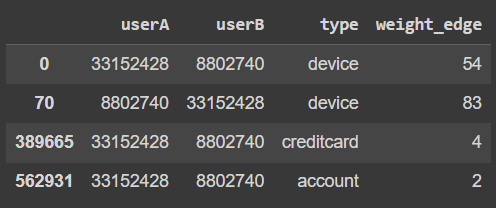


In [63]:
couple_comon_userid_unduplicate.loc[:, ['userA', 'userB']] = np.sort(couple_comon_userid_unduplicate[['userA', 'userB']], axis=1)
couple_comon_userid_unduplicate = couple_comon_userid_unduplicate.groupby(['userA', 'userB', 'type'], as_index=False).agg({'weight_edge': 'sum'})
couple_comon_userid_unduplicate

<ipython-input-63-6b05ad956302>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  couple_comon_userid_unduplicate.loc[:, ['userA', 'userB']] = np.sort(couple_comon_userid_unduplicate[['userA', 'userB']], axis=1)


,userA,userB,type,weight_edge
0,21386,203270,device,1
1,21386,548978,device,1
2,21386,979386,device,1
3,21386,1476080,device,1
4,21386,1557132,device,1
...,...,...,...,...
73799,235457118,235460800,device,1
73800,235458308,235465454,device,1
73801,235504736,235621942,device,1
73802,235558978,235611426,device,1


#### Check user 33152428 trong bảng userset

Mục đích để kiểm tra bậc của node xem đúng không

In [64]:
mask = userset['userset'].apply(lambda x: 33152428 in x)
filtered_df = userset[mask]
print(filtered_df)
print(len(filtered_df))

                    userset        type
0       [33152428, 8802740]      device
30      [8802740, 33152428]      device
632     [8802740, 33152428]      device
1213    [8802740, 33152428]      device
3624    [8802740, 33152428]      device
...                     ...         ...
79986   [33152428, 8802740]      device
96559   [33152428, 8802740]      device
120433  [33152428, 8802740]  creditcard
121598  [33152428, 8802740]  creditcard
149383  [33152428, 8802740]     account

[71 rows x 2 columns]
71


In [65]:
filtered_df

,userset,type
0,"[33152428, 8802740]",device
30,"[8802740, 33152428]",device
632,"[8802740, 33152428]",device
1213,"[8802740, 33152428]",device
3624,"[8802740, 33152428]",device
...,...,...
79986,"[33152428, 8802740]",device
96559,"[33152428, 8802740]",device
120433,"[33152428, 8802740]",creditcard
121598,"[33152428, 8802740]",creditcard


In [66]:
couple_comon_userid_unduplicate[couple_comon_userid_unduplicate[['userA', 'userB']].isin([33152428, 8802740]).all(axis=1)]

,userA,userB,type,weight_edge
6946,8802740,33152428,account,1
6947,8802740,33152428,creditcard,2
6948,8802740,33152428,device,68


In [67]:
df_user_relation[df_user_relation['userid'] == 33152428]

,userid,refitem,type,device,account,creditcard,usercode,userset
0,33152428,KXC0oY3MMrTG+bnlFFvBPXZC5PW8iw6kgWztENWdIJg=,device,1,0,0,33152428,"33152428, 8802740"
9477,33152428,sSCBSlU4f9V6+i7Vcl+wRKxrLgxDsph7/C/eGKQujXy=,device,1,0,0,33152428,"33152428, 8802740"
14584,33152428,GdTeHIO5p8Dnp5NodUwEr/WFm82Zd+1+D4Ft2Z5hrGA=,device,1,0,0,33152428,"33152428, 8802740"
19265,33152428,WzrCpOtFShpDpiBNvEH0rjau4b6+45weu+H/5KTGeac=,device,1,0,0,33152428,"33152428, 8802740"
20693,33152428,jq5RMqOw1mgEQXzqSfSZqBfblnkv4+uJk+HCWf897Am=,device,1,0,0,33152428,"33152428, 8802740"
21281,33152428,hjK9LgdJ9wZuvqx41ogpZk1Jdi5giEhg3aMiM7c9eQE=,device,1,0,0,33152428,"33152428, 8802740"
22233,33152428,zpCbe+0IUl27LgCgId1CgkNw3qXH6VIT3iy8oQ1nuwS=,device,1,0,0,33152428,"33152428, 8802740"
25919,33152428,ytebIFGfwh+XEhtQp4brUgF85Axfd8OlqCsOn77a5o4=,device,1,0,0,33152428,"33152428, 8802740"
27021,33152428,Ge3U0yq7LYYOPAuMCSwa4s0glt2U7B/3vHXfhKIZUGW=,device,1,0,0,33152428,"33152428, 8802740"
27940,33152428,fnF64071j2bk3Wt+Qh19gFqpmrbZf0+u/QbyqBT/Isq=,device,1,0,0,33152428,"33152428, 8802740"


#### Check user 6314374 trong bảng userset

In [68]:
couple_comon_userid[(couple_comon_userid['userA'] == 6314374) | (couple_comon_userid['userB'] == 6314374)]

,userA,userB,type,weight_edge


In [69]:
mask = userset['userset'].apply(lambda x: 6314374	in x)
filtered_df = userset[mask]
print(filtered_df)
print(len(filtered_df))

Empty DataFrame
Columns: [userset, type]
Index: []
0


In [70]:
df_user_relation[df_user_relation['userid'] == 6314374]

,userid,refitem,type,device,account,creditcard,usercode,userset


# Dựng Graphs

In [71]:
# Import the NetworkX package
import networkx as nx

In [72]:
G = nx.Graph()
print(G.is_directed())

# Add graph level attribute
G.graph["Name"] = "Shope Fraud"
print(G.graph)

False
{'Name': 'Shope Fraud'}


In [73]:
user_node = pd.concat([couple_comon_userid['userA'],couple_comon_userid['userB']])
user_node = user_node.to_list()
G.add_nodes_from(user_node)

In [74]:
user_edges = tuple(map(tuple, couple_comon_userid[['userA',	'userB']].to_numpy()))
G.add_edges_from(user_edges)

In [75]:
print(G.number_of_nodes())
print(G.number_of_edges())

58652
59289


# Visual Graphs

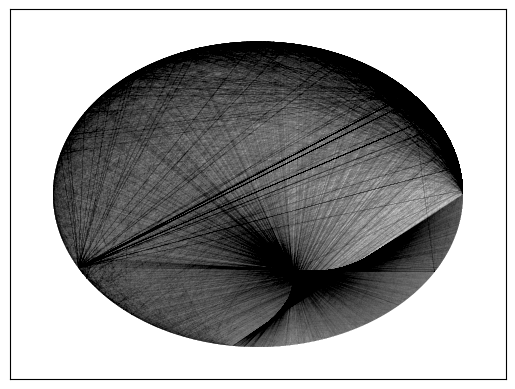

In [76]:
pos = nx.circular_layout(G)
nx.draw_networkx_edges(G, pos, width=0.01, alpha=0.5)
# nx.draw(G.subgraph([0, 1, 2]), pos=pos, node_color="red")

# Hàm kiểm tra đường đi
(Xem có tồn tại 2 node của đường đi hay không)

In [77]:
def has_path_node(G, sellerID, buyerID):

  if G.has_node(sellerID) and G.has_node(buyerID):
    if nx.has_path(G, sellerID, buyerID):
      return True
    else:
      return False
  else:
    return False

In [78]:
df_orderid = pd.read_csv('/content/drive/Othercomputers/My Laptop/Shopee/fraud_shopee/orders.csv')
df_orderid

,orderid,buyer_userid,seller_userid
0,1953278092,47388162,20822974
1,1953295120,26855196,16416890
2,1953306402,121296714,28477978
3,1953314712,131221930,72837912
4,1953381964,183398314,28423332
...,...,...,...
620942,1956636054,14222102,70940136
620943,1956642760,2978154,60766142
620944,1956651496,221974772,15541938
620945,1956660812,152533590,80986700


In [79]:
print(has_path_node(G, 131221930,	72837912))

False


In [80]:
df_orderid['has_path'] = df_orderid.apply(lambda x: has_path_node(G, x.buyer_userid, x.seller_userid), axis = 1)

In [81]:
df_orderid[df_orderid['has_path'] == True]

,orderid,buyer_userid,seller_userid,has_path
1649,1954198318,221232712,66353306,True
2679,1955598428,35545436,70763052,True
3545,1954515646,32834366,188151804,True
5938,1953728724,168491444,158559422,True
8393,1955955178,235599454,51098362,True
...,...,...,...,...
612805,1955929340,235579716,80629986,True
614563,1954626246,197784360,12132476,True
616320,1953812320,235299524,229915488,True
616725,1954821958,111271962,66519400,True


In [82]:
submit = pd.read_csv('/content/drive/Othercomputers/My Laptop/Shopee/fraud_shopee/submission.csv')
submit[submit['is_fraud'] == 1]

,orderid,is_fraud
1649,1954198318,1
2679,1955598428,1
3545,1954515646,1
5938,1953728724,1
8393,1955955178,1
...,...,...
612805,1955929340,1
614563,1954626246,1
616320,1953812320,1
616725,1954821958,1


In [83]:
temp = submit[submit['is_fraud'] == 1].merge(df_orderid[df_orderid['has_path'] == True], how='outer', on='orderid')
temp

,orderid,is_fraud,buyer_userid,seller_userid,has_path
0,1954198318,1,221232712,66353306,True
1,1955598428,1,35545436,70763052,True
2,1954515646,1,32834366,188151804,True
3,1953728724,1,168491444,158559422,True
4,1955955178,1,235599454,51098362,True
...,...,...,...,...,...
473,1955929340,1,235579716,80629986,True
474,1954626246,1,197784360,12132476,True
475,1953812320,1,235299524,229915488,True
476,1954821958,1,111271962,66519400,True


In [84]:
temp[temp['has_path'].isna()]

,orderid,is_fraud,buyer_userid,seller_userid,has_path
